# Exercise: Polynomial Regression and KNN


A) Use the Auto dataset, find the $R^2$ score of a linear regression model that predicts the miles per gallon (mpg) from the horsepower.

Hints:

    Create model object using: model=LinearRegression()

    Fit the model: fitted_model=model.fit(X_train,Y_train)

    Find the R squared metric using: fitted_model.score(X_test,Y_test)


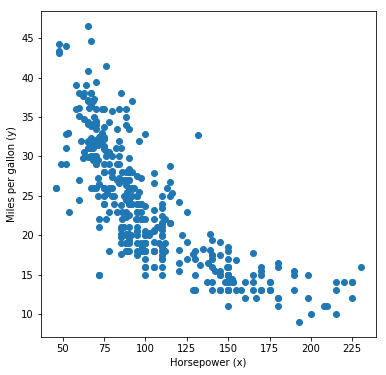

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

AutoData=read_csv('Auto_modify.csv') # read the data

X_auto_hp=AutoData.horsepower.values.reshape(-1,1) # define features: horsepower 
Y_auto_mpg=AutoData.mpg.values.reshape(-1,1) # define label: miles per gallon

# ploting the data points
plt.figure(figsize=(6,6))
plt.scatter(X_auto_hp, Y_auto_mpg, marker = 'o')

plt.xlabel('Horsepower (x)')
plt.ylabel('Miles per gallon (y)')

# Split to train and test
X_train, X_test, Y_train, Y_test= train_test_split(X_auto_hp, Y_auto_mpg, random_state= 0)

In [4]:
# A
model=LinearRegression()
fitted_model=model.fit(X_train,Y_train)
r_square_A = fitted_model.score(X_test,Y_test)
print ('R squared is',r_square_A)

R squared is 0.62176588114


B) Use polynomial regression to include both the horsepower feature and $(horsepower)^2$ in the regression model. Find the $R^2$ metric. 

Hint: You can use [numpy.concatenate](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html). For example to add to an array U a column vector $W^2$, we can use X=np.concatenate((U,W**2),axis=1)


C) Optional: repeat (B) increase the degree of the polynomial to 3, then 4, then 5 and check the accuracy in each case.


In [6]:
# B
X2 = pow(X_auto_hp,2)
X=np.concatenate((X_auto_hp,X2),axis=1)

# Split to train and test
X_trainB, X_testB, Y_trainB, Y_testB= train_test_split(X, Y_auto_mpg, random_state= 0)
modelB=LinearRegression()
fitted_modelB=modelB.fit(X_trainB,Y_trainB)
r_square_B = fitted_modelB.score(X_testB,Y_testB)
print ('R squared is',r_square_B)

R squared is 0.727103150464


In [53]:
# C
X3 = pow(X_auto_hp,3)
X_auto_3=np.concatenate((X_auto_hp,X3),axis=1)
X_trainC3, X_testC3, Y_trainC3, Y_testC3= train_test_split(X_auto_3, Y_auto_mpg, random_state= 0)
r_square_C3=fitted_model.score(X_testC3,Y_testC3)
modelC3=LinearRegression()
fitted_model=modelC3.fit(X_trainC3,Y_trainC3)
r_square_C3 = fitted_model.score(X_testC3,Y_testC3)
print ('R squared is of 3 polynomial',r_square_C3)

X4 = pow(X_auto_hp,4)
X_auto_4=np.concatenate((X_auto_hp,X4),axis=1)
X_trainC4, X_testC4, Y_trainC4, Y_testC4= train_test_split(X_auto_4, Y_auto_mpg, random_state= 0)
r_square_C4=fitted_model.score(X_testC4,Y_testC4)
modelC4=LinearRegression()
fitted_model=modelC4.fit(X_trainC4,Y_trainC4)
r_square_C4 = fitted_model.score(X_testC4,Y_testC4)
print ('R squared is of 4 polynomial',r_square_C4)

X5 = pow(X_auto_hp,5)
X_auto_5=np.concatenate((X_auto_hp,X5),axis=1)
X_trainC5, X_testC5, Y_trainC5, Y_testC5= train_test_split(X_auto_5, Y_auto_mpg, random_state= 0)
r_square_C5=fitted_model.score(X_testC5,Y_testC5)
modelC5=LinearRegression()
fitted_model=modelC3.fit(X_trainC5,Y_trainC5)
r_square_C5 = fitted_model.score(X_testC5,Y_testC5)
print ('R squared is of 5 polynomial',r_square_C5)

R squared is of 3 polynomial 0.722640633343
R squared is of 4 polynomial 0.716289682568
R squared is of 5 polynomial 0.709686560629


D) Use KNN regression to predict the miles per gallon(mpg) with K=7, and find $R^2$ metric in the following cases 

- One feature: Horsepower only

- Two features: horsepower and (horsepower)2 

Hint: 

    Create KNN regression object using neighbors.KNeighborsRegressor:

    knnRegression = neighbors.KNeighborsRegressor(n_neighbors=7)

    Use the .fit and .score methods as before

E) COMMENT on your results: which model performs better? How does performance change when adding the quadratic feature?


In [66]:
from sklearn import neighbors
# D one feature
X_trainD1, X_testD1, Y_trainD1, Y_testD1= train_test_split(X_auto_hp, Y_auto_mpg, random_state= 0)

knnRegression = neighbors.KNeighborsRegressor(n_neighbors=7)
fitted_model=knnRegression.fit(X_trainD1,Y_trainD1)
fitted_model.score(X_testD1,Y_testD1)
r_square_D1 = fitted_model.score(X_testD1,Y_testD1)
print ('R squared of one feature KNN is',r_square_D1)

#D two features
X2 = pow(X_auto_hp,2)
X=np.concatenate((X_auto_hp,X2),axis=1)
X_trainD2, X_testD2, Y_trainD2, Y_testD2= train_test_split(X, Y_auto_mpg, random_state= 0)

knnRegression = neighbors.KNeighborsRegressor(n_neighbors=7)
fitted_model=knnRegression.fit(X_trainD2,Y_trainD2)
fitted_model.score(X_testD2,Y_testD2)
r_square_D2 = fitted_model.score(X_testD2,Y_testD2)
print ('R squared of one feature KNN is',r_square_D2)

R squared of one feature KNN is 0.667477744171
R squared of one feature KNN is 0.670108404882


In [ ]:
# E
# For predicting the miles per gallon (mpg) from only horsepower feature, the linear regression model fits better.
# After adding the quadratic feature, the KNN model fits better.